In [76]:
#Q1

import pandas as pd
df = pd.read_csv('./diabetes.csv')

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [78]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

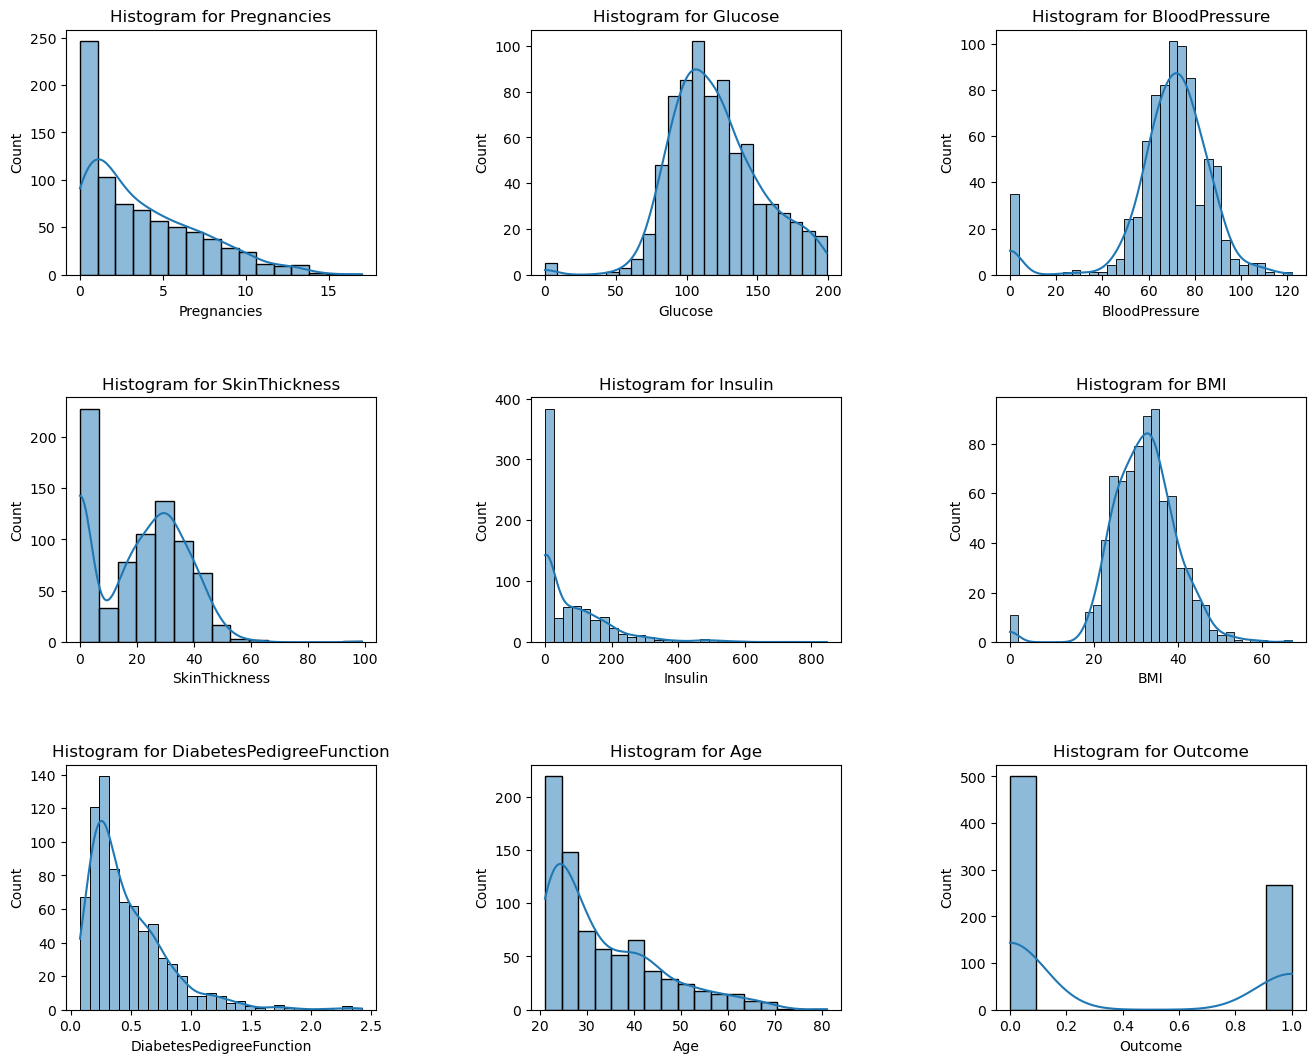

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
x = 1
plt.figure(figsize=(16,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
for i in df.columns:
    plt.subplot(3,3,x)
    x = x+1
    sns.histplot(data=df,x=i,kde='true')
    plt.title(f'Histogram for {i}')
plt.show()

In [80]:
#Q2

cols_zero_val = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [81]:
print('Zero Values in the Data which dont make sense:')
for i in cols_zero_val:    
    print(f'{i} : {len(df[df[i]==0])}')

Zero Values in the Data which dont make sense:
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11


In [82]:
for i in cols_zero_val:
    df[i] = df[i].replace(0,df[i].median())
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [83]:
#Q3

X = df.drop(labels=['Outcome'],axis=1)
Y = df[['Outcome']]

In [84]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.25, random_state=42)

In [85]:
xtrain.shape

(576, 8)

In [86]:
xtest.shape

(192, 8)

In [87]:
#Q4

parameters = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':list(range(1,13)),
    'max_features':['sqrt','log2']
}

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
gscv = GridSearchCV(dtc,param_grid=parameters,cv=5,scoring='roc_auc')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [89]:
gscv.best_params_

{'criterion': 'log_loss',
 'max_depth': 6,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [90]:
gscv.best_score_

0.8054589743589743

In [91]:
dtc_best = gscv.best_estimator_

In [92]:
dtc_best.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='log_loss', max_depth=6, max_features='sqrt')

In [93]:
#Q5

ypred_test = dtc_best.predict(xtest)

In [94]:
from sklearn.metrics import classification_report

In [95]:
from sklearn.metrics import accuracy_score
acc_test = accuracy_score(ytest, ypred_test)
print(f'Accuracy Score for test data is {acc_test:.4f}')

Accuracy Score for test data is 0.7188


In [96]:
from sklearn.metrics import roc_auc_score
ypred_prob = dtc_best.predict_proba(xtest)[:,-1]
auc = roc_auc_score(ytest,ypred_prob)
print(f'ROC-AUC Score for the model is : {auc:.4f}')

ROC-AUC Score for the model is : 0.7347


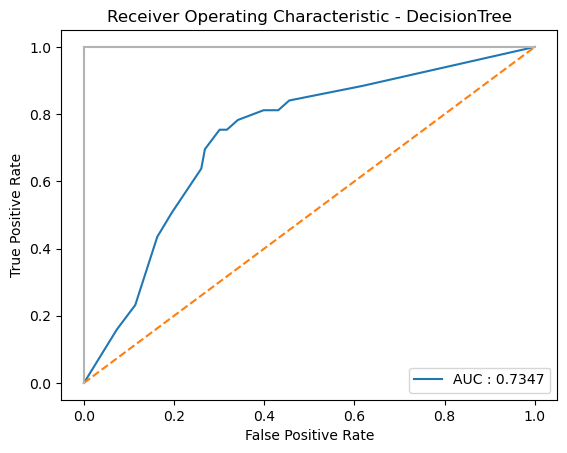

In [97]:
from sklearn.metrics import roc_curve
fpr, tpr, thr = roc_curve(ytest,ypred_prob)
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(fpr, tpr, label=f'AUC : {auc:.4f}')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

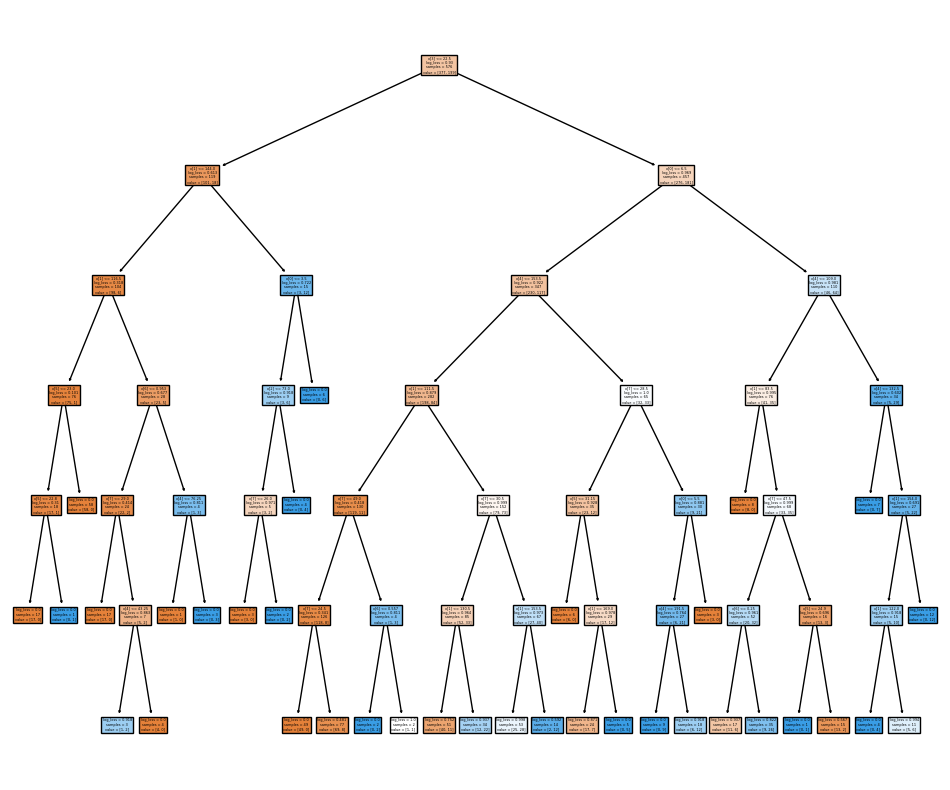

In [98]:
#Q6

from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(dtc_best,filled=True)
plt.show()

In [99]:
imp = dtc_best.feature_importances_
imp = pd.Series(imp)
imp.index = xtrain.columns
imp = imp.sort_values(ascending=False)
imp

Glucose                     0.443368
Age                         0.155170
Insulin                     0.120229
Pregnancies                 0.088874
SkinThickness               0.076916
BMI                         0.055234
DiabetesPedigreeFunction    0.047140
BloodPressure               0.013069
dtype: float64

In [100]:
#Q7

patient_data = {
    'Pregnancies':[3],
    'Glucose':[200],
    'BloodPressure':[80],
    'SkinThickness':[45],
    'Insulin':[512],
    'BMI':[31],
    'DiabetesPedigreeFunction':[0.160],
    'Age':[55]
}

In [101]:
df_data = pd.DataFrame(patient_data)
df_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,200,80,45,512,31,0.16,55


In [102]:
pred = dtc_best.predict(df_data)[0]
pred

1

In [103]:
if pred==1:
    print('Patient is Diabetic')
    print(f'Probbaibility of diabetic : {dtc_best.predict_proba(df_data)[0][1]}')
else:
    print('Patient is non Diabetic')
    print(f'Probaibility of diabetic : {dtc_best.predict_proba(df_data)[0][1]}')

Patient is Diabetic
Probbaibility of diabetic : 0.6666666666666666


In [104]:
%pip install lime

Note: you may need to restart the kernel to use updated packages.


In [105]:
from lime.lime_tabular import LimeTabularExplainer
features = list(xtrain.columns)
explainer = LimeTabularExplainer(xtrain.values,
                                 feature_names=features,
                                 class_names=[0,1],
                                 verbose=True,
                                 mode='classification')

In [106]:
from warnings import filterwarnings
filterwarnings('ignore')
exp = explainer.explain_instance(df_data.values.flatten(),dtc_best.predict_proba,num_features=xtrain.shape[1])


Intercept 0.16558908099587974
Prediction_local [0.93423647]
Right: 0.6666666666666666


In [ ]:
exp.show_in_notebook(show_table=True)